## Mixed martial arts and head trauma

In this notebook, we'll go through how to get a dataset from the internet, clean the data so it can be analysed, and then begin analysing it to investigate a question. This is not a complete analysis, but is shows the first steps involved in data analysis.

### Context

Mixed martial arts (MMA) is a combat sport that allows strikes to the head in the form of punches, elbow strikes, knee strikes and kicks. In their review, Schlegel et al (2021) report that the estimated incidence of head trauma is between 58% and 78% of all injuries in the sport. 

Further, Schlegel et al (2021) report that MMA fighters exhibit impaired processing speed, verbal memory and psychomotor speed, presumably as a result of repeated blows to the head, concussions and/or resultant loss of consciousness. In fact, multiple medical societies have called for mixed martial arts (MMA) to be banned, due to the inherent risk of serious acute injury, and of chronic traumatic encephalopathy (Schlegel et al, 2021). 

Let's say I'm interested in the following question: 

> <i> 'Is mixed martial arts more dangerous, with regard to serious head trauma, for males or females?' </i>

To investigate this I can use the dataset hosted at: https://www.kaggle.com/mdabbert/ultimate-ufc-dataset

I've downloaded the `ufc-master.csv` file, for which the 'About this file' section states:

> 'A combination of multiple UFC datasets. Includes every UFC fight from mid 2010 until the present. Rows refer to individual bouts. Columns offer features of the fighters and the fight itself.'

This .csv file contains data from all the fights since 2010 in a specific MMA organization. I have downloaded and unzipped the data file, and moved it into my working directory. In order to import it using just it's file name, the file must be in the working directory of jupyter notebook, or your Deepnote notebook, see: https://stackoverflow.com/questions/15680463/change-ipython-jupyter-notebook-working-directory

<i> Hint: </i> you can use the command `pwd` to see what your working directory is currently (see the cell below). You can change the working directory using the command `cd` (for 'change directory') followed by the path of the directory you want to use as the working directory. E.g. `cd "C:\Users\username\Desktop"`.

In [1]:
pwd

'C:\\Users\\peter'

To have a look at the dataset, I import it in the following way:

In [2]:
# importing the libraries I will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the data
df_orig = pd.read_csv('ufc-master.csv')

# show the first 5 rows
df_orig.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Alistair Overeem,Alexander Volkov,150,-182,150.000000,54.945055,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cory Sandhagen,Frankie Edgar,-400,300,25.000000,300.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alexandre Pantoja,Manel Kape,-125,100,80.000000,100.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Diego Ferreira,Beneil Dariush,-125,105,80.000000,105.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michael Johnson,Clay Guida,-225,175,44.444444,175.000000,2/6/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you look at the top of the dataframe output above, there is a `DtypeWarning`. This applies to `Columns (79,80)`. So let's have a look at those to see what might be causing the warning, which I may need to fix if I want to use data from those columns:

In [3]:
# checking the columns mentioned in the warning above (I'm not interested in them, so not investigating further)
df_orig.iloc[:, 79:81]

,B_match_weightclass_rank,R_match_weightclass_rank
0,6,5
1,4,2
2,NaN,5
3,13,10
4,NaN,NaN
...,...,...
4561,NaN,NaN
4562,NaN,NaN
4563,NaN,NaN
4564,NaN,NaN


The warning is caused by some observations in each column having different data times. This could be a problem, but as it happens I'm not interested in those columns, so will not investigate the warning further.

I'd like to get an idea of what variables are in the dataset, to work out how I can investigate my research question:

In [4]:
# seeing what variables are in the dataset

print(len(df_orig.columns))
df_orig.columns

137


Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'R_td_attempted_bout', 'B_td_attempted_bout', 'R_td_pct_bout',
       'B_td_pct_bout', 'R_sub_attempts_bout', 'B_sub_attempts_bout',
       'R_pass_bout', 'B_pass_bout', 'R_rev_bout', 'B_rev_bout'],
      dtype='object', length=137)

By default, pandas has truncated the output above, showing only a subset of the 137 variables in the dataset. I'd like to see all of them. To do this I can use:

In [5]:
# overcoming the truncation

for i in df_orig.columns:
    print(i)
    
# using list(df_orig.columns) would also work

R_fighter
B_fighter
R_odds
B_odds
R_ev
B_ev
date
location
country
Winner
title_bout
weight_class
gender
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_landed
B_avg_TD_pct
B_longest_win_streak
B_losses
B_total_rounds_fought
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B_win_by_Submission
B_win_by_TKO_Doctor_Stoppage
B_wins
B_Stance
B_Height_cms
B_Reach_cms
B_Weight_lbs
R_current_lose_streak
R_current_win_streak
R_draw
R_avg_SIG_STR_landed
R_avg_SIG_STR_pct
R_avg_SUB_ATT
R_avg_TD_landed
R_avg_TD_pct
R_longest_win_streak
R_losses
R_total_rounds_fought
R_total_title_bouts
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
R_wins
R_Stance
R_Height_cms
R_Reach_cms
R_Weight_lbs
R_age
B_age
lose_streak_dif
win_streak_dif
longest_win_streak_dif
win_dif
loss_

Because I'm interested in whether the risk of knockout/technical knockout is greater for males or females in mixed martial arts
contests, I'd like to calculate the proportion of contests which end in a knockout, and compare this for male and female athletes.

So I extract just the variables I need, which for now are `gender` and `finish`. (`finish` contains information about how the contest ended: by judges' decision, by knockout, by submission etc.):

In [6]:
# creating a dataframe which contains only the variables I need
df = df_orig[['gender','finish']].copy()

df = df.dropna()
        
df

,gender,finish
211,MALE,U-DEC
212,MALE,U-DEC
213,FEMALE,U-DEC
214,MALE,U-DEC
215,MALE,U-DEC
...,...,...
4561,MALE,KO/TKO
4562,MALE,KO/TKO
4563,MALE,KO/TKO
4564,MALE,U-DEC


It's useful at this point to use the `.unique()` pandas method, to check what unique values are in each column (especially if you're dealing with categorical data, as we are here):

In [7]:
df['gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [8]:
df['finish'].unique()

array(['U-DEC', 'SUB', 'S-DEC', 'KO/TKO', 'M-DEC', 'DQ', 'Overturned'],
      dtype=object)

Looking at the unique values in each column is useful for a few reasons. It lets us check if there are mixed datatypes (or nan values). If there are, we will probably need to clean the columns, as mixed data types can cause errors (e.g. if a function expects a certain data type, it will not work on mixed data. This would be be a problem if we wanted to analyse data from the two columns mentioned in the `DtypeWarning` earlier in the notebook). 

Checking the unique values in a column also let's us look for data entry errors (misspellings etc.), which in this case might cause us to miscount the number of knockouts etc. if some of the entries are misspelled.

In this case the values look fine, so I can proceed to making separate dataframes, one for the female athletes and one for the male athletes:

In [9]:
# creating a dataframe of just female athletes
female = df[df['gender'] == 'FEMALE'].copy()

display(female)

,gender,finish
213,FEMALE,U-DEC
216,FEMALE,SUB
219,FEMALE,SUB
223,FEMALE,KO/TKO
225,FEMALE,U-DEC
...,...,...
3542,FEMALE,S-DEC
3559,FEMALE,U-DEC
3610,FEMALE,KO/TKO
3628,FEMALE,KO/TKO


In [10]:
# another dataframe for just male athletes
male = df[df['gender'] == 'MALE'].copy()

display(male)

,gender,finish
211,MALE,U-DEC
212,MALE,U-DEC
214,MALE,U-DEC
215,MALE,U-DEC
217,MALE,U-DEC
...,...,...
4561,MALE,KO/TKO
4562,MALE,KO/TKO
4563,MALE,KO/TKO
4564,MALE,U-DEC


## Specifying and testing hypotheses

Remember, the research question for this analysis is:

> <i> 'Is mixed martial arts more dangerous, with regard to serious head trauma, for males or females?' </i>

So let's begin by specifying our null hypothesis:

$h_0$ : the proportion of contests ending via knockout is the same for males and females

and our alternate hypothesis:

$h_1$ : the proportion of contests ending via knockout is <b> not </b> the same for males and females


Let's think about what these hypotheses mean. If the null hypothesis is true, then an athlete's gender has no relationship to their risk of getting knocked out: our best bet for predicting an indvidual's risk of getting knocked out is the *overall* proportion of contests that end via knockout.

If the alternate hypothesis is true, then an athlete's gender has a predictive relationship to their risk of getting knocked out: our best bet for predicting an indvidual's risk of getting knocked out is the proportion of contests *involving athletes of that gender* that end via knockout.

Put another way, let's call the proportion of all fights which end in knockouts, regardless of the gender of the competitors, the *unconditional knockout risk*. Let's call the proportion of male fights ending by knockout the *conditional male knockout risk*. And let's call the proportion of female fights ending by knockout the *conditional male knockout risk*. 

The null hypothesis states gender is not a significant predictor of knockout risk, so the *conditional male knockout risk* and the *conditional female knockout risk* should both equal the *unconditional knockout risk*.

The alternate hypothesis states that at least one of the conditional risks is NOT equal to the unconditional knockout risk. E.g. gender is a significant predictor of knockout risk.

I'm going to use the `np.count_nonzero()` function to calculate these proportions, and print them out, to get an idea of which hypothesis might be correct:

In [11]:
# calculating the proportion of contests ending via knockout, regardless of gender
unconditional_ko_proportion = np.count_nonzero(df['finish'] == 'KO/TKO')/len(df)

# printing out the overall proportion of knockouts, regardless of gender
print('Contests ended in (technical) knockouts', unconditional_ko_proportion*100, '% of the time.')

# calculating the proportion of contests ending via knockout for female contestants
female_ko_proportion = np.count_nonzero(female['finish'] == 'KO/TKO')/len(female)

# printing out the female KO proportion
print('Female contests ended in (technical) knockouts', female_ko_proportion*100, '% of the time.')

# calculating the proportion of contests ending via knockout for male contestants
male_ko_proportion = np.count_nonzero(male['finish'] == 'KO/TKO')/len(male)

# printing out the male KO proportion
print('Male contests ended in (technical) knockouts', male_ko_proportion*100, '% of the time.')

Contests ended in (technical) knockouts 31.738708110733366 % of the time.
Female contests ended in (technical) knockouts 17.41424802110818 % of the time.
Male contests ended in (technical) knockouts 33.19069269858251 % of the time.


At a first pass, it looks like MMA, based on this dataset, might carry a larger risk of head trauma for male athletes.

Let's illustrate that graphically, using the proportions just calculated:

Text(0.5, 1.0, 'Percentage of figts ending via KO or TKO')

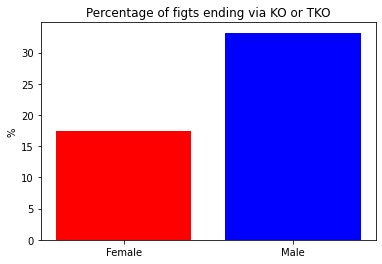

In [12]:
plt.bar(['Female', 'Male'], [female_ko_proportion*100, male_ko_proportion*100], color = ['red', 'blue'])
plt.ylabel('%')
plt.title('Percentage of figts ending via KO or TKO')

Again, from the graph, it certainly looks like the risk of knockout is greater for male fighters.

Before performing any further analyses, we will need a summary statistic of this effect.

One option is the *risk difference*, which is just the difference in the proportions (the proportion of female KOs minus the proportion of male KOs, or vice versa):

In [13]:
# calculating the risk difference
risk_difference = female_ko_proportion - male_ko_proportion
print(risk_difference)

-0.15776444677474327


So, there is about 15.7% greater risk of being knocked out for males, relative to females.

Could this effect be fluke though? E.g. consider the whole population of interest, which is all MMA fights in all organizations, rather than just the ones in this dataset; which are from one organization. You can think of the fights in this dataset as a subset of that wider population of all MMA fights.

If there is no greater risk of being knocked out, given being male, in that population, then the effect in this dataset must be a fluke (e.g. an effect/pattern in a sample that is not reflective of the pattern in the underlying population). 

Statistical tests - like t-tests, ANOVAs, permutation tests etc. - allow us to estimate the probability of observing an effect as large as the one we observed if we were sampling from a population where in fact there was no effect.

We will use the now familiar permutation test:

In [14]:
# permutation testing the risk difference 

# setting the number of iterations
n_iters = 10000

# copying the dataframe for the simulation, to avoid overwriting the original data
df_sim = df.copy()

# creating an array to store the results of the simulation
simulation_results = np.zeros(n_iters)

# a for loop reading, 'for 10000 repeats...'
for i in np.arange(n_iters):
    
    # shuffling the finishes around, removing any association between finish type and gender
    df_sim['finish'] = np.random.permutation(df_sim['finish'])
    
    # creating a separate dataframe for female athletes, from the shuffled data
    fake_female = df_sim[df_sim['gender'] == 'FEMALE']
    
    # creating a separate dataframe for male athletes, from the shuffled data
    fake_male = df_sim[df_sim['gender'] == 'MALE']
    
    # calculating the female KO proportion, from the shuffled data
    fake_female_ko_proportion = np.count_nonzero(fake_female['finish'] == 'KO/TKO')/len(fake_female)
    
    # calculating the male KO proportion, from the shuffled data
    fake_male_ko_proportion = np.count_nonzero(fake_male['finish'] == 'KO/TKO')/len(fake_male)
    
    # calculating the risk difference, from the shuffled data
    fake_risk_difference = fake_female_ko_proportion - fake_male_ko_proportion
    
    # putting the simulated risk difference in the results array
    simulation_results[i] = fake_risk_difference


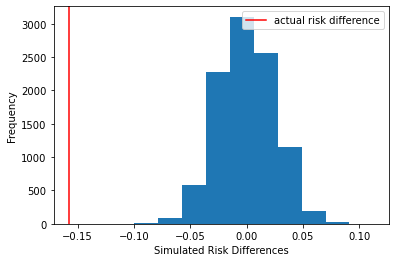

P = 0.0


In [15]:
# plotting the simulated risk differences along with the actual risk difference
plt.hist(simulation_results)
plt.xlabel('Simulated Risk Differences')
plt.ylabel('Frequency')
plt.axvline(risk_difference, color = 'red', label = 'actual risk difference')
plt.legend()
plt.show()

# calculating a p-value (the probability of getting our result, if the null hypothesis was true)
p_value = np.count_nonzero(simulation_results >= np.abs(risk_difference))/len(simulation_results)
print('P =', p_value)

So it seems we can be confident that there is a real effect here: the risk of being knocked out is higher for males, and the risk difference is statistically significant, based on the permutation test.

But is being male the actual risk factor, or could it be something that correlates with being male that increases the risk of knockout, rather than being male per se? 

## Investigating potential confounding variables

To test competing explanations of the significant risk difference we can try and use *statistical control*. This is where we try to eliminate the influence of other factors, and see if the effect remains. E.g. we want to rule out explanations which say that an additional confounding variable explains the association between knockout risk and being male, rather than being male per se being the risk factor.

For instance, does the risk difference we just calculated remain if we factor in weight class? From inspecting the unique weight class values we can see that women compete in lower weight classes e.g. there is not a "Women's Heavyweight" etc. weight class. 

Maybe the increased risk of knockout could be explained by weight, rather than gender?:

In [16]:
# looking at the weight classes
df_orig['weight_class'].unique()

array(['Heavyweight', 'Bantamweight', 'Flyweight', 'Lightweight',
       'Light Heavyweight', "Women's Flyweight", 'Featherweight',
       'Middleweight', "Women's Strawweight", "Women's Bantamweight",
       'Catch Weight', 'Welterweight', "Women's Featherweight"],
      dtype=object)

If we control for weight, does the significant risk difference remain? One way of testing this is to perform the permutation test within a weight class that both males and females compete in, so weight is held roughly equal, and we can get some evidence about whether the risk difference is due to gender or due to males tending to compete in heavier weight classes.

Let's use the bantamweight weight class, as there is both a male and female bantamweight class, based on the array shown in the output of the cell above.

In [17]:
# looking just at male and female bantamweights, to see if the risk difference in knockouts remains when weight is equal

# creating a dataframe just containing the data for bantamweights
bantamweights = df_orig[(df_orig['weight_class'] == "Women's Bantamweight") | (df_orig['weight_class'] == "Bantamweight")]

bantamweights = bantamweights[['gender', 'finish', 'weight_class']]

# dropping nan values
bantamweights.dropna(inplace = True)

#creating a dataframe for female bantamweights
female_bantamweights = bantamweights[bantamweights['gender'] == 'FEMALE']

#creating a dataframe for male bantamweights
male_bantamweights = bantamweights[bantamweights['gender'] == 'MALE']

display(female_bantamweights)
display(male_bantamweights)

,gender,finish,weight_class
271,FEMALE,U-DEC,Women's Bantamweight
308,FEMALE,U-DEC,Women's Bantamweight
323,FEMALE,U-DEC,Women's Bantamweight
340,FEMALE,KO/TKO,Women's Bantamweight
383,FEMALE,U-DEC,Women's Bantamweight
...,...,...,...
3542,FEMALE,S-DEC,Women's Bantamweight
3559,FEMALE,U-DEC,Women's Bantamweight
3610,FEMALE,KO/TKO,Women's Bantamweight
3628,FEMALE,KO/TKO,Women's Bantamweight


,gender,finish,weight_class
221,MALE,S-DEC,Bantamweight
231,MALE,KO/TKO,Bantamweight
233,MALE,U-DEC,Bantamweight
256,MALE,KO/TKO,Bantamweight
273,MALE,U-DEC,Bantamweight
...,...,...,...
4310,MALE,S-DEC,Bantamweight
4329,MALE,U-DEC,Bantamweight
4332,MALE,U-DEC,Bantamweight
4346,MALE,U-DEC,Bantamweight


In [18]:
# caclulating the KO proportions for bantamweights

crude_ko_proportion_bantamweights = np.count_nonzero(bantamweights['finish'] == 'KO/TKO')/len(bantamweights)

print('Bantamweight contests ended in (technical) knockouts', crude_ko_proportion_bantamweights*100, '% of the time.')

female_ko_proportion_bantamweights = np.count_nonzero(female_bantamweights['finish'] == 'KO/TKO')/len(female_bantamweights)

print('Female bantamweight contests ended in (technical) knockouts', female_ko_proportion_bantamweights*100, '% of the time.')

male_ko_proportion_bantamweights = np.count_nonzero(male_bantamweights['finish'] == 'KO/TKO')/len(male_bantamweights)

print('Male bantamweight contests ended in (technical) knockouts', male_ko_proportion_bantamweights*100, '% of the time.')

Bantamweight contests ended in (technical) knockouts 26.277372262773724 % of the time.
Female bantamweight contests ended in (technical) knockouts 27.480916030534353 % of the time.
Male bantamweight contests ended in (technical) knockouts 25.899280575539567 % of the time.


It appears that, at least for this weight class, when we control for weight, the association between knockouts and gender reverses. Female bantamweights are more likely to get knocked out than male batamweights.


Let's calculate the bantamweight risk difference:

In [19]:
bantamweight_risk_difference = female_ko_proportion_bantamweights - male_ko_proportion_bantamweights
print(bantamweight_risk_difference)

0.015816354549947842


OK, so female bantamweights are about 1.58% more likely to get knocked out than male bantamweights:

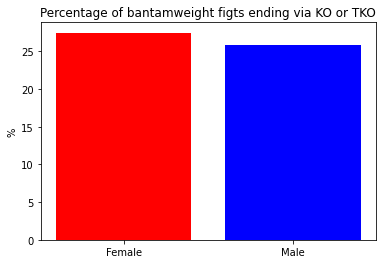

In [20]:
plt.bar(['Female', 'Male'], [female_ko_proportion_bantamweights*100, male_ko_proportion_bantamweights*100], color = ['red', 'blue'])
plt.ylabel('%')
plt.title('Percentage of bantamweight figts ending via KO or TKO')
plt.show()

We can again test if this difference is likely to be a fluke:

In [21]:
# permutation testing the bantamweight risk difference

# setting the number of iterations for the test
n_iters = 10000

# copying the bantamweights df, to avoid overwriting the original data
bantamweights_sim = bantamweights.copy()

# creating an array to store the results
simulation_results = np.zeros(n_iters)

# for loop for the simulation
for i in np.arange(n_iters):
    
    # shuffling the finishes, removing any association between gender and finish type
    bantamweights_sim['finish'] = np.random.permutation(bantamweights_sim['finish'])
    
    # a df for the shuffled female data
    fake_female = bantamweights_sim[bantamweights_sim['gender'] == 'FEMALE']
    
    # a df for the shuffled male data
    fake_male = bantamweights_sim[bantamweights_sim['gender'] == 'MALE']
    
    # female ko proportion from the shuffled data
    fake_female_ko_proportion = np.count_nonzero(fake_female['finish'] == 'KO/TKO')/len(fake_female)
    
    # male ko proportion from the shuffled data
    fake_male_ko_proportion = np.count_nonzero(fake_male['finish'] == 'KO/TKO')/len(fake_male)
    
    # simulated risk difference
    fake_risk_difference = fake_female_ko_proportion - fake_male_ko_proportion
    
    # adding the simulated risk difference to the results array
    simulation_results[i] = fake_risk_difference

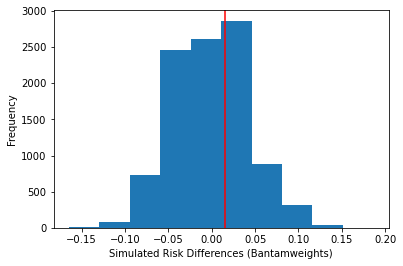

P = 0.4105


In [22]:
# plotting the simulation results
plt.hist(simulation_results)
plt.xlabel('Simulated Risk Differences (Bantamweights)')
plt.ylabel('Frequency')
plt.axvline(bantamweight_risk_difference, markersize = 10, color = 'red') 
plt.show()

# calculating a p-value (the probability of getting our result, if the null hypothesis was true e.g. there is no difference 
# in the population that the data was sample from, in this case, all bantamweight mma contests)
p_value = np.count_nonzero(simulation_results >= np.abs(bantamweight_risk_difference))/len(simulation_results)
print('P =', p_value)

On the basis of this preliminary analysis, it appears that, within the same (bantamweight) weight class, males are not significantly more likely to be knocked out than females. It is therefore possible than the risk difference observed across all weight classes (males more likely to be knocked out) is due to weight, rather than to gender.

## Summary

This has been a brief tutorial on how to get a dataset from the internet, how to clean it, and how to begin analysing the data. It is not a complete analysis, there are many other hypotheses we could test (by testing within other weight classes for instance). But these would this notebook has shown the first steps in a data analysis: get the data, clean the data, specify hypotheses, test the hypotheses, test alternate explanations for the results...

## References

Schlegel, P., Novotny, M., Valis, M., & Klimova, B. (2021). Head injury in mixed martial arts: a review of epidemiology, affected brain structures and risks of cognitive decline. The Physician and sportsmedicine, 49(4), 371-380. (https://www.tandfonline.com/doi/pdf/10.1080/00913847.2021.1885966?casa_token=hJMdEByhs68AAAAA:ER6lGZkkcWXlMr4czxbQ6db7KvrPrKZJ4SpR0wD6AGtjyJPMtxftqfoiLnt37QVYUCcvWaRmsCf6UA)